In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

In [10]:
def plot_probability_array(X,probability_array):

    plot_array=np.zeros((X.shape[0],30))
    col_start=0
    ones=np.ones((X.shape[0],30))
    for class_,col_end in enumerate([10,20,30]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

Text(0, 0.5, 'petal width')

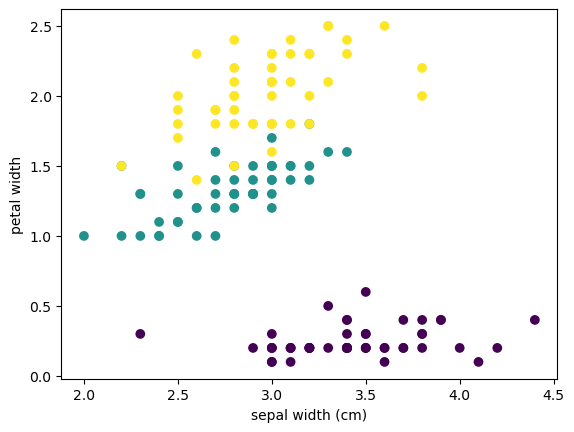

In [52]:
pair=[1, 3]
iris = datasets.load_iris()
X = iris.data[:, pair]
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis)
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width")

In [68]:
def plot_decision_boundary_SVC(X, y, model):
    # Create a meshgrid over the feature space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict on the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.tab10)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


In [54]:
model = SVC(kernel="linear", gamma=0.5, probability=True)
model.fit(X,y)
yhat = model.predict(X)
accuracy_score(y, yhat)

0.96

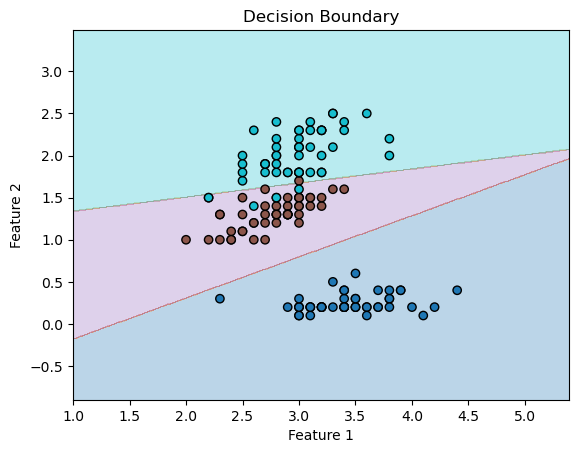

In [70]:
plot_decision_boundary_SVC(X,y,model)

In [96]:
# A helper function to plot the decision boundary
def plot_decision_boundary(X, y, classifier, ax, class_idx):
    # Meshgrid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    ax.set_title(f"Decision Boundary for Class {class_idx}")

In [98]:
ovr = OneVsRestClassifier(SVC(kernel='linear', gamma=0.5, probability=True))

ovr.fit(X, y)
probability = ovr.predict_proba(X)
ovr_arg = np.argmax(probability, axis=1)

print("Accuracy:", accuracy_score(y, ovr_arg))

Accuracy: 0.9466666666666667


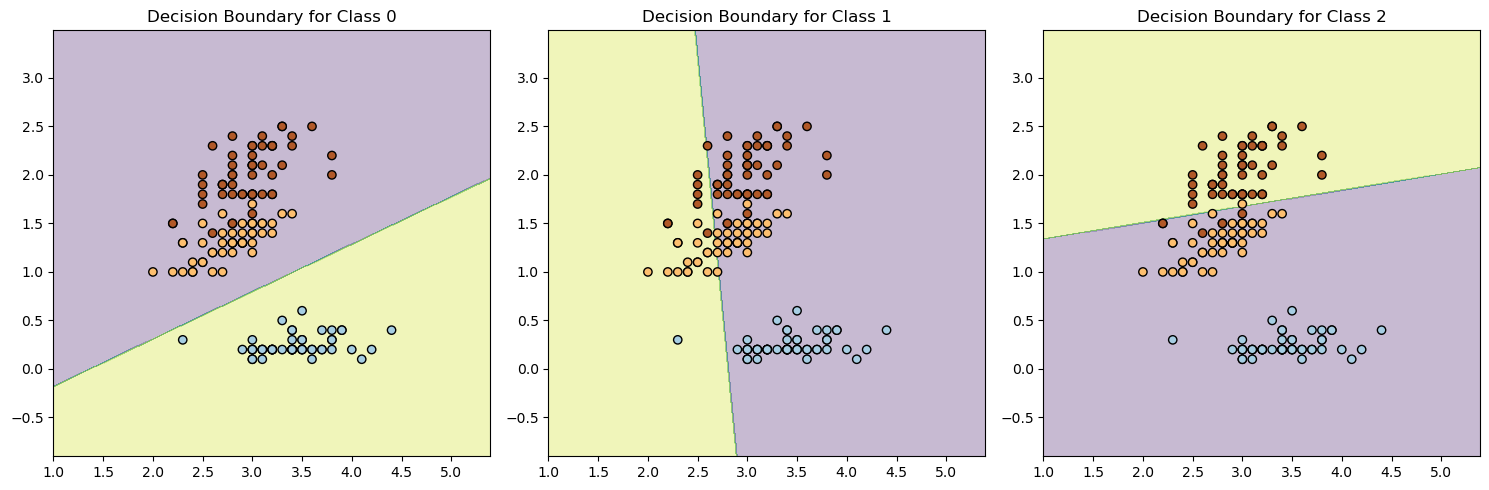

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (model, ax) in enumerate(zip(ovr.estimators_, axes)):
    plot_decision_boundary(X, y, model, ax, class_idx=i)

plt.tight_layout()
plt.show()

In [83]:
ovo = OneVsOneClassifier(SVC(kernel='linear', gamma=0.5, probability=True))
ovo.fit(X, y)
pre = ovo.predict(X)
print("Accuracy:", accuracy_score(y, pre))

Accuracy: 0.96


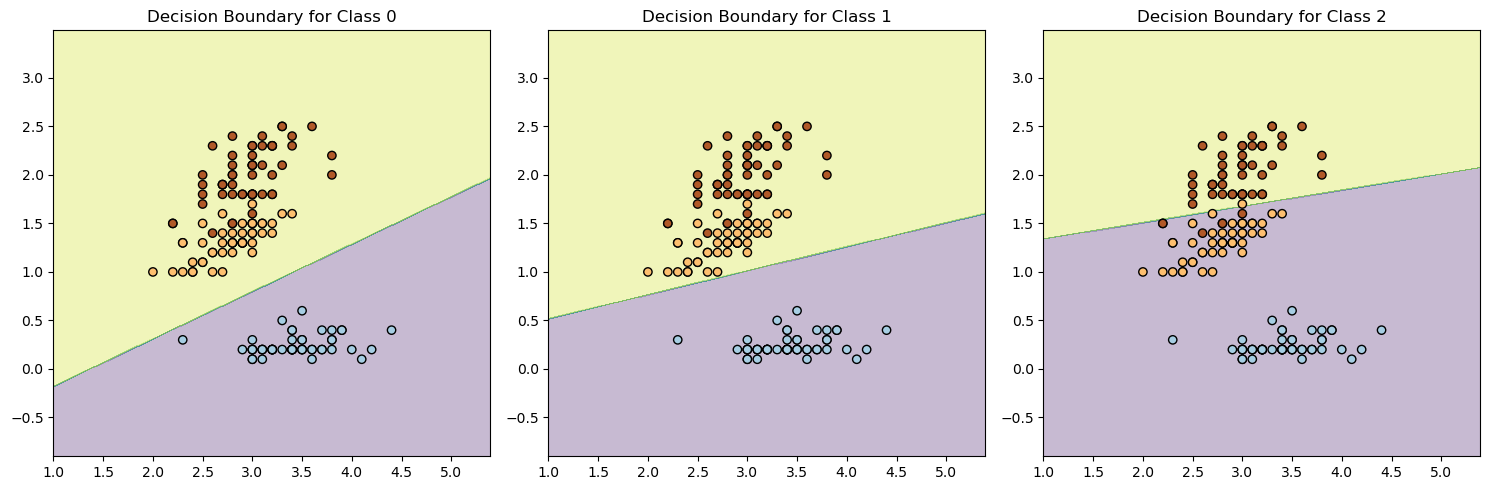

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (model, ax) in enumerate(zip(ovo.estimators_, axes)):
    plot_decision_boundary(X, y, model, ax, class_idx=i)

plt.tight_layout()
plt.show()

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'rbf', 'poly']}
svc = SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [129]:
print("Best parameters found: ", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)

Best parameters found:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best estimator:  SVC(C=0.1, gamma=1)


In [131]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

